In [ ]:
import pandas as pd
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

path='/content/gp_practice_population_demographics_merged.xlsx'
df = pd.read_excel(path,sheet_name='data')
print("shape: ",df.shape)
print("Dtypes: ",df.dtypes)
print(df.head(5))

shape:  (83391, 23)
Dtypes:  Date            datetime64[ns]
PracticeCode             int64
HB                      object
HSCP                    object
Sex                     object
SexQF                   object
AllAges                float64
Ages0to4               float64
Ages0To4QF              object
Ages5to14              float64
Ages5To14QF             object
Ages15to24             float64
Ages15To24QF            object
Ages25to44             float64
Ages25To44QF            object
Ages45to64             float64
Ages45To64QF            object
Ages65to74             float64
Ages65To74QF            object
Ages75to84             float64
Ages75To84QF            object
Ages85plus             float64
Ages85PlusQF            object
dtype: object
        Date  PracticeCode         HB       HSCP     Sex SexQF  AllAges  \
0 2014-01-01         10002  S08000030  S37000003     All     d   7247.0   
1 2014-01-01         10002  S08000030  S37000003  Female   NaN   3682.0   
2 2014-01-01       

In [ ]:
missing_values = (df.isna().mean() * 100).sort_values(ascending=False)
print("Top missing columns (%): ")
print(missing_values)


duplicate_rows = df.duplicated().sum()
print("duplicated rows: ",duplicate_rows)

Top missing columns (%): 
Ages65To74QF    99.088631
Ages85PlusQF    99.088631
Ages75To84QF    99.088631
Ages15To24QF    99.088631
Ages25To44QF    99.088631
Ages5To14QF     99.088631
Ages0To4QF      99.088631
Ages45To64QF    99.088631
SexQF           66.663069
Ages25to44       0.143900
Ages15to24       0.143900
Ages65to74       0.143900
Ages45to64       0.143900
Ages0to4         0.143900
Ages5to14        0.143900
Ages75to84       0.143900
Ages85plus       0.143900
AllAges          0.019187
HSCP             0.000000
Date             0.000000
Sex              0.000000
PracticeCode     0.000000
HB               0.000000
dtype: float64
duplicated rows:  0


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
print("Min date: ",df["Date"].min())
print("Max date: ",df["Date"].max())

if "PracticeCode" in df.columns:
    print("Unique practices:", df["PracticeCode"].nunique())

for col in ["Sex", "HB", "HSCP"]:
    if col in df.columns:
        print(col, "unique:", df[col].nunique())

Min date:  2014-01-01 00:00:00
Max date:  2021-07-01 00:00:00
Unique practices: 1082
Sex unique: 3
HB unique: 16
HSCP unique: 33


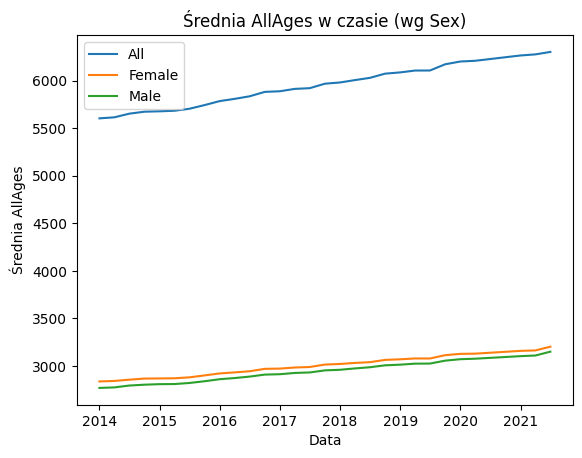

In [ ]:
col = "AllAges"
tmp = df.copy()
tmp = tmp.dropna(subset=[col])
ts = tmp.groupby(["Date","Sex"])[col].mean().reset_index()
plt.figure()

for sex in ts["Sex"].unique():
  sub = ts[ts["Sex"] == sex]
  plt.plot(sub["Date"],sub[col],label=str(sex))
plt.title(f"Średnia {col} w czasie (wg Sex)")
plt.xlabel("Data")
plt.ylabel(f"Średnia {col}")
plt.legend()
plt.show()

In [ ]:
df_mf = df[df["Sex"].isin(["Male","Female"])].copy()
df_all = df[df["Sex"] == "All"].copy()

print(df_mf.shape)
print(df_all.shape)

(55591, 23)
(27800, 23)


In [ ]:
key = ["Date","PracticeCode"]
sex_sets = df.groupby(key)["Sex"].apply(lambda s:set(s)).reset_index(name="sex_set")
bad = sex_sets[sex_sets["sex_set"] != {"Male","Female","All"}]
print(f"Niepełny zestaw Sex (Date,PracticeCode): {len(bad)}")
print(bad.head(10))


Niepełny zestaw Sex (Date,PracticeCode): 9
            Date  PracticeCode        sex_set
182   2014-01-01         22033    {All, Male}
709   2014-01-01         65931    {All, Male}
1177  2014-04-01         22033    {All, Male}
1701  2014-04-01         65931    {All, Male}
4446  2015-01-01         49431  {All, Female}
13873 2017-07-01         22033    {All, Male}
14830 2017-10-01         22033    {All, Male}
15785 2018-01-01         22033    {All, Male}
16738 2018-04-01         22033    {All, Male}


In [ ]:
df_all["AllAges"].describe()

,AllAges
count,27800.000000
mean,5931.153957
std,3720.676061
min,0.000000
25%,3173.000000
50%,5494.500000
75%,8180.250000
max,48657.000000


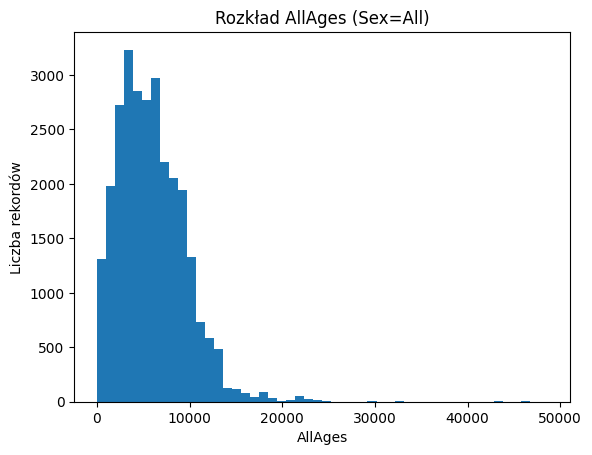

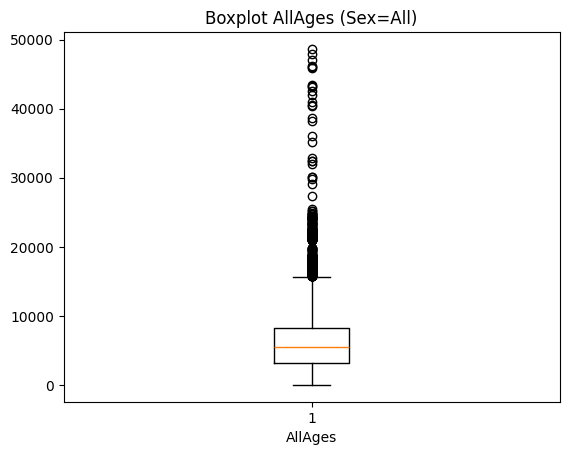

In [ ]:

x = df_all["AllAges"].dropna()

plt.figure()
plt.hist(x, bins=50)
plt.title("Rozkład AllAges (Sex=All)")
plt.xlabel("AllAges")
plt.ylabel("Liczba rekordów")
plt.show()

plt.figure()
plt.boxplot(x, vert=True)
plt.title("Boxplot AllAges (Sex=All)")
plt.xlabel("AllAges")
plt.show()


In [ ]:
df_all.sort_values("AllAges", ascending=False)[["Date","PracticeCode","HB","HSCP","AllAges"]].head(10)


,Date,PracticeCode,HB,HSCP,AllAges
81792,2021-07-01,43576,S08000031,S37000034,48657.0
79023,2021-04-01,43576,S08000031,S37000034,47877.0
76248,2021-01-01,43576,S08000031,S37000034,47049.0
70665,2020-01-01,43576,S08000031,S37000034,46215.0
73461,2020-04-01,43576,S08000031,S37000034,46086.0
67866,2019-10-01,43576,S08000031,S37000034,45912.0
59406,2019-01-01,43576,S08000021,S37000034,43368.0
62232,2019-04-01,43576,S08000021,S37000034,43222.0
65055,2019-07-01,43576,S08000031,S37000034,43164.0
56574,2018-10-01,43576,S08000021,S37000034,42631.0


In [ ]:
zero_cnt = (df_all["AllAges"] == 0).sum()
print("Liczba rekordów z AllAges = 0:", zero_cnt)
print("Procent:", round(100*zero_cnt/len(df_all), 3), "%")

df_all_nz = df_all[df_all["AllAges"] > 0].copy()
df_all_nz["AllAges"].describe()


Liczba rekordów z AllAges = 0: 2
Procent: 0.007 %


,AllAges
count,27798.000000
mean,5931.580689
std,3720.469742
min,1.000000
25%,3173.250000
50%,5495.500000
75%,8180.750000
max,48657.000000


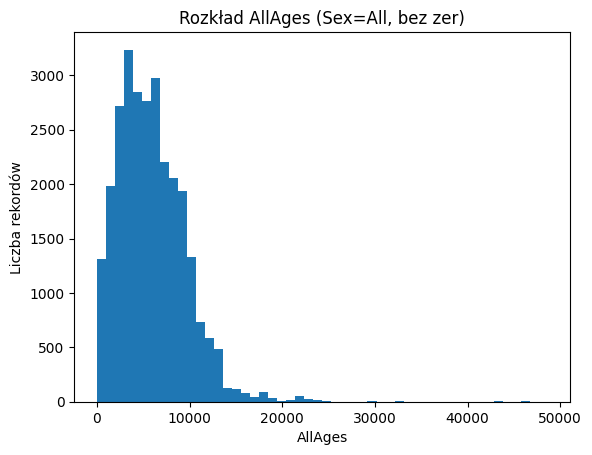

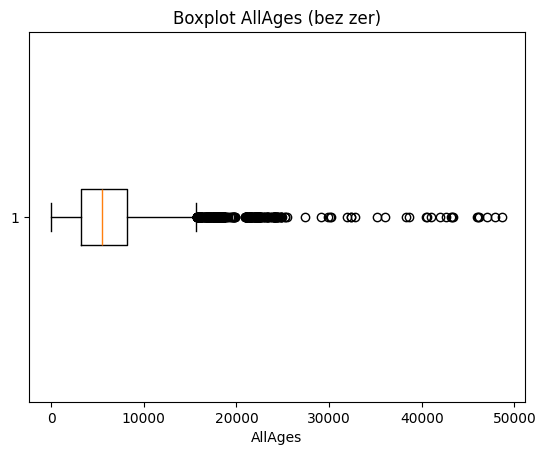

In [ ]:
import matplotlib.pyplot as plt

x = df_all_nz["AllAges"]

plt.figure()
plt.hist(x, bins=50)
plt.title("Rozkład AllAges (Sex=All, bez zer)")
plt.xlabel("AllAges")
plt.ylabel("Liczba rekordów")
plt.show()

plt.figure()
plt.boxplot(x, vert=False)
plt.title("Boxplot AllAges (bez zer)")
plt.xlabel("AllAges")
plt.show()


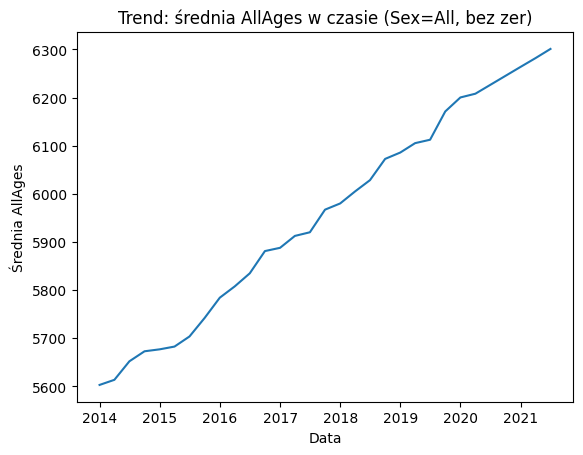

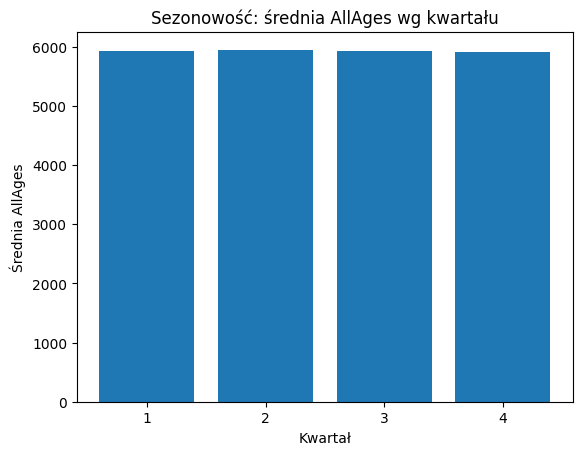

In [ ]:
import matplotlib.pyplot as plt

ts = df_all_nz.groupby("Date")["AllAges"].mean().reset_index()

plt.figure()
plt.plot(ts["Date"], ts["AllAges"])
plt.title("Trend: średnia AllAges w czasie (Sex=All, bez zer)")
plt.xlabel("Data")
plt.ylabel("Średnia AllAges")
plt.show()

tmp = df_all_nz.copy()
tmp["Quarter"] = tmp["Date"].dt.quarter

q = tmp.groupby("Quarter")["AllAges"].mean().reset_index()

plt.figure()
plt.bar(q["Quarter"].astype(str), q["AllAges"])
plt.title("Sezonowość: średnia AllAges wg kwartału")
plt.xlabel("Kwartał")
plt.ylabel("Średnia AllAges")
plt.show()


In [ ]:
hb_counts = df_all_nz["HB"].value_counts().head(10)
print("Top 10 HB (liczba rekordów):")
print(hb_counts)

hscp_counts = df_all_nz["HSCP"].value_counts().head(10)
print("\nTop 10 HSCP (liczba rekordów):")
print(hscp_counts)

hb_mean = df_all_nz.groupby("HB")["AllAges"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 HB (średnia AllAges):")
print(hb_mean)


Top 10 HB (liczba rekordów):
HB
S08000021    5326
S08000024    3563
S08000022    2856
S08000023    2376
S08000020    2168
S08000030    1880
S08000029    1651
S08000031    1646
S08000015    1614
S08000019    1600
Name: count, dtype: int64

Top 10 HSCP (liczba rekordów):
HSCP
S37000034    4245
S37000012    2125
S37000016    1905
S37000035    1615
S37000028    1471
S37000014    1270
S37000006     958
S37000004     951
S37000002     938
S37000001     852
Name: count, dtype: int64

Top 10 HB (średnia AllAges):
HB
S08000020    7967.052583
S08000024    7661.314903
S08000015    6922.607807
S08000032    6793.377465
S08000029    6707.261660
S08000030    6588.698936
S08000023    6275.421296
S08000019    5765.293125
S08000031    5599.240583
S08000021    5265.852234
Name: AllAges, dtype: float64


In [ ]:


meta = {"Date","PracticeCode","HB","HSCP","Sex"}
age_cols = [c for c in df_all_nz.columns
            if c not in meta and not c.lower().endswith("qf")]

for c in age_cols:
    df_all_nz[c] = pd.to_numeric(df_all_nz[c], errors="coerce")

print("Liczba kolumn do korelacji:", len(age_cols))
age_cols


Liczba kolumn do korelacji: 9


['AllAges',
 'Ages0to4',
 'Ages5to14',
 'Ages15to24',
 'Ages25to44',
 'Ages45to64',
 'Ages65to74',
 'Ages75to84',
 'Ages85plus']

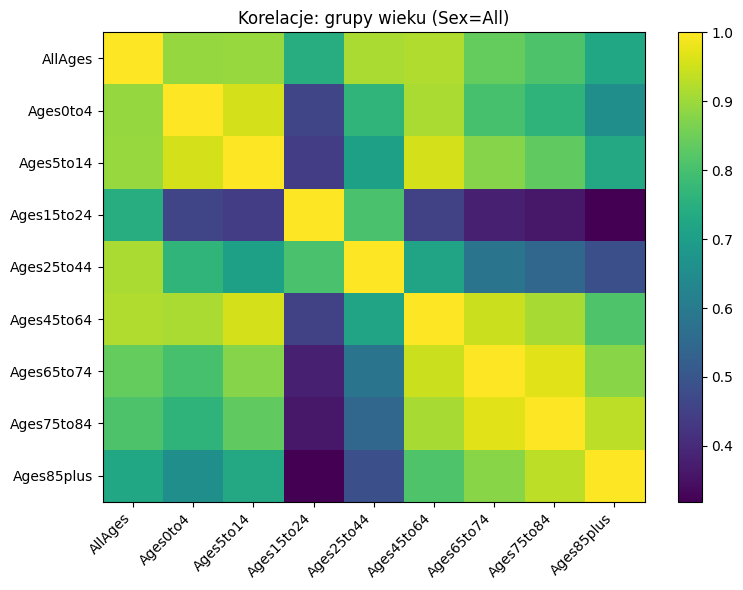

In [ ]:
corr = df_all_nz[age_cols].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.title("Korelacje: grupy wieku (Sex=All)")

plt.xticks(range(len(age_cols)), age_cols, rotation=45, ha="right")
plt.yticks(range(len(age_cols)), age_cols)

plt.tight_layout()
plt.show()

In [ ]:
q1 = df_all_nz["AllAges"].quantile(0.25)
q3 = df_all_nz["AllAges"].quantile(0.75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

outliers = df_all_nz[(df_all_nz["AllAges"] < low) | (df_all_nz["AllAges"] > high)]
print("Granice IQR:", low, high)
print("Liczba outlierów:", len(outliers))
outliers.sort_values("AllAges", ascending=False)[["Date","PracticeCode","HB","HSCP","AllAges"]].head(10)


Granice IQR: -4338.0 15692.0
Liczba outlierów: 375


,Date,PracticeCode,HB,HSCP,AllAges
81792,2021-07-01,43576,S08000031,S37000034,48657.0
79023,2021-04-01,43576,S08000031,S37000034,47877.0
76248,2021-01-01,43576,S08000031,S37000034,47049.0
70665,2020-01-01,43576,S08000031,S37000034,46215.0
73461,2020-04-01,43576,S08000031,S37000034,46086.0
67866,2019-10-01,43576,S08000031,S37000034,45912.0
59406,2019-01-01,43576,S08000021,S37000034,43368.0
62232,2019-04-01,43576,S08000021,S37000034,43222.0
65055,2019-07-01,43576,S08000031,S37000034,43164.0
56574,2018-10-01,43576,S08000021,S37000034,42631.0


In [ ]:


texts = (df_all_nz["HB"].astype(str) + " " + df_all_nz["HSCP"].astype(str)).dropna()

def clean(t):
    t = t.lower()
    t = re.sub(r"[^a-z0-9\s]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

texts_clean = texts.map(clean)

lengths = texts_clean.map(lambda x: len(x.split()))
print("Liczba dokumentów:", len(texts_clean))
print("Średnia długość (w słowach):", lengths.mean())
print("Mediana długości:", lengths.median())


Liczba dokumentów: 27798
Średnia długość (w słowach): 2.0
Mediana długości: 2.0


In [ ]:
tokens = " ".join(texts_clean).split()
cnt_uni = Counter(tokens)
print("Top 10 unigramów:", cnt_uni.most_common(10))

bigrams = list(zip(tokens, tokens[1:]))
cnt_bi = Counter([" ".join(b) for b in bigrams])
print("Top 10 bigramów:", cnt_bi.most_common(10))


Top 10 unigramów: [('s08000021', 5326), ('s37000034', 4245), ('s08000024', 3563), ('s08000022', 2856), ('s08000023', 2376), ('s08000020', 2168), ('s37000012', 2125), ('s37000016', 1905), ('s08000030', 1880), ('s08000029', 1651)]
Top 10 bigramów: [('s08000021 s37000034', 3240), ('s37000034 s08000021', 3180), ('s08000024 s37000012', 2125), ('s37000012 s08000024', 2120), ('s08000022 s37000016', 1905), ('s37000016 s08000022', 1876), ('s08000029 s37000014', 1270), ('s37000014 s08000029', 1248), ('s08000023 s37000035', 1248), ('s37000035 s08000023', 1238)]


In [ ]:
print("Puste HB:", (df_all_nz["HB"].astype(str).str.strip() == "").sum())
print("Puste HSCP:", (df_all_nz["HSCP"].astype(str).str.strip() == "").sum())
print("Braki HB:", df_all_nz["HB"].isna().sum())
print("Braki HSCP:", df_all_nz["HSCP"].isna().sum())


Puste HB: 0
Puste HSCP: 0
Braki HB: 0
Braki HSCP: 0
